Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

🚗 Rusty Bargain Used Car Price Prediction Project Plan
1. Data Preprocessing
Load the data and take a quick look (head, info, describe).

Check for missing values.

Handle missing values appropriately.

Encode categorical variables:

For linear regression, decision tree, and random forest, use One-Hot Encoding.

For LightGBM, CatBoost, leave as-is or use Label Encoding if needed.

Split data into features (X) and target (y), then into train/valid/test sets.

2. Model Training and Evaluation
We'll try these models:

Linear Regression (sanity check)

Decision Tree Regressor (with hyperparameter tuning)

Random Forest Regressor (with hyperparameter tuning)

LightGBM Regressor (with hyperparameter tuning)

(Optional) CatBoost and/or XGBoost Regressor (if time permits)

We'll evaluate each model by:

RMSE (Root Mean Squared Error)

Training time

Prediction speed

3. Analysis and Comparison
Summarize which model performs best overall.

Discuss trade-offs between accuracy, training speed, and prediction speed.

4. Final Deliverables
Clean, neat code

No unnecessary duplication

Clear final findings and recommendations

If you're good with this structure, I’ll jump straight into Step 1: Data Overview and Preprocessing!
Ready? 🚀

## Data preparation

In [1]:
import pandas as pd

# Following the user's instruction
df = df=pd.read_csv('/datasets/car_data.csv')

# Quick overview of the data
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

(        DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
 0  24/03/2016 11:52    480         NaN              1993  manual      0   
 1  24/03/2016 10:58  18300       coupe              2011  manual    190   
 2  14/03/2016 12:52   9800         suv              2004    auto    163   
 3  17/03/2016 16:54   1500       small              2001  manual     75   
 4  31/03/2016 17:25   3600       small              2008  manual     69   
 
    Model  Mileage  RegistrationMonth  FuelType       Brand NotRepaired  \
 0   golf   150000                  0    petrol  volkswagen         NaN   
 1    NaN   125000                  5  gasoline        audi         yes   
 2  grand   125000                  8  gasoline        jeep         NaN   
 3   golf   150000                  6    petrol  volkswagen          no   
 4  fabia    90000                  7  gasoline       skoda          no   
 
         DateCreated  NumberOfPictures  PostalCode          LastSeen  
 0  24/03/2016 00:0

Here's a quick summary of the initial data overview:

📊 Dataset Summary
Rows: 354,369

Columns: 16

Target Column: Price (unit: Euros)

Feature Types:

Numerical: Price, RegistrationYear, Power, Mileage, RegistrationMonth, NumberOfPictures, PostalCode

Categorical: VehicleType, Gearbox, Model, FuelType, Brand, NotRepaired

Date/Time (text right now): DateCrawled, DateCreated, LastSeen

⚠️ Problems found:
Missing values in several categorical features:

VehicleType, Gearbox, Model, FuelType, and NotRepaired.

Some strange values:

RegistrationYear has a minimum value of 1000 and maximum of 9999 → clearly incorrect years.

Power has minimum 0 and maximum 20000 → extremely unrealistic values (maybe outliers).

📋 Next Steps for Preprocessing:
Drop unnecessary features:

Columns like DateCrawled, DateCreated, LastSeen, PostalCode, NumberOfPictures are probably not helpful for prediction.

Fix RegistrationYear:

Remove cars with impossible registration years (e.g., before 1900 or after 2025).

Fix Power:

Remove or clip unrealistic power values (e.g., >1000 hp?).

Handle missing values:

Fill missing categorical features with 'unknown' or the most common value.

Encode categorical features properly based on the model:

One-Hot Encoding for linear regression, decision trees, and random forests.

Label Encoding (or native handling) for LightGBM and CatBoost.

Split data into training, validation, and testing sets.

Scale numeric features (only for Linear Regression).

## Model training

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import numpy as np

# Step 1: Drop unnecessary features
columns_to_drop = ['DateCrawled', 'DateCreated', 'LastSeen', 'PostalCode', 'NumberOfPictures']
df = df.drop(columns=columns_to_drop)

# Step 2: Clean RegistrationYear
# Keep only reasonable years
df = df[(df['RegistrationYear'] >= 1900) & (df['RegistrationYear'] <= 2025)]

# Step 3: Clean Power
# We'll keep cars with realistic power (e.g., between 10 hp and 1000 hp)
df = df[(df['Power'] >= 10) & (df['Power'] <= 1000)]

# Step 4: Handle missing values
# Fill missing categorical values with 'unknown'
categorical_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']
for col in categorical_columns:
    df[col] = df[col].fillna('unknown')

# Step 5: Split into features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Step 6: Split data into train/valid/test sets
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Confirm shapes
X_train.shape, X_valid.shape, X_test.shape


((188151, 10), (62717, 10), (62718, 10))

📋 Data Status after Preprocessing
Set	Rows	Features
Train	188,151	10
Valid	62,717	10
Test	62,718	10
Dropped unnecessary columns: DateCrawled, DateCreated, LastSeen, PostalCode, NumberOfPictures.

Cleaned RegistrationYear (1900–2025) and Power (10–1000 hp).

Missing values filled with 'unknown' for categorical columns.

Data is now split properly into train, validation, and test sets.

🔥 Next Step:
Prepare two versions of data encoding:

For Linear/Decision Tree/Random Forest → One-Hot Encode categorical features.

For LightGBM → Label Encode categorical features.

In [3]:
# Step 7: Encode Features

# Categorical columns to encode
categorical_cols = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

# One-Hot Encoding for Linear Regression, Decision Tree, Random Forest
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform training data
X_train_ohe = ohe.fit_transform(X_train[categorical_cols])
X_valid_ohe = ohe.transform(X_valid[categorical_cols])
X_test_ohe = ohe.transform(X_test[categorical_cols])

# Extract numerical columns
numerical_cols = X_train.drop(columns=categorical_cols).columns

X_train_num = X_train[numerical_cols].to_numpy()
X_valid_num = X_valid[numerical_cols].to_numpy()
X_test_num = X_test[numerical_cols].to_numpy()

# Combine numerical and categorical data
import numpy as np

X_train_prepared = np.hstack((X_train_num, X_train_ohe))
X_valid_prepared = np.hstack((X_valid_num, X_valid_ohe))
X_test_prepared = np.hstack((X_test_num, X_test_ohe))

# Label Encoding for LightGBM
from sklearn.preprocessing import LabelEncoder

X_train_lgb = X_train.copy()
X_valid_lgb = X_valid.copy()
X_test_lgb = X_test.copy()

for col in categorical_cols:
    encoder = LabelEncoder()
    X_train_lgb[col] = encoder.fit_transform(X_train_lgb[col])
    X_valid_lgb[col] = encoder.transform(X_valid_lgb[col])
    X_test_lgb[col] = encoder.transform(X_test_lgb[col])

# Shapes confirmation
print('OHE prepared shapes:', X_train_prepared.shape, X_valid_prepared.shape, X_test_prepared.shape)
print('Label Encoded shapes:', X_train_lgb.shape, X_valid_lgb.shape, X_test_lgb.shape)


OHE prepared shapes: (188151, 317) (62717, 317) (62718, 317)
Label Encoded shapes: (188151, 10) (62717, 10) (62718, 10)


In [4]:
# Corrected Step 8.1: Train and Evaluate Linear Regression (with scaled numerical features)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import time

# 1. Scale only the numerical features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numerical_cols])
X_valid_num_scaled = scaler.transform(X_valid[numerical_cols])
X_test_num_scaled = scaler.transform(X_test[numerical_cols])

# 2. Combine scaled numerical features with OHE categorical features
X_train_prepared_scaled = np.hstack((X_train_num_scaled, X_train_ohe))
X_valid_prepared_scaled = np.hstack((X_valid_num_scaled, X_valid_ohe))
X_test_prepared_scaled = np.hstack((X_test_num_scaled, X_test_ohe))

# 3. Train Linear Regression
start_time = time.time()
linear_model = LinearRegression()
linear_model.fit(X_train_prepared_scaled, y_train)
training_time = time.time() - start_time

# 4. Predict and Evaluate
start_time = time.time()
y_pred_valid = linear_model.predict(X_valid_prepared_scaled)
prediction_time = time.time() - start_time

rmse_linear_corrected = mean_squared_error(y_valid, y_pred_valid, squared=False)

# 5. Show corrected results
print(f"Corrected Linear Regression - Training Time: {training_time:.2f} seconds")
print(f"Corrected Linear Regression - Prediction Time: {prediction_time:.4f} seconds")
print(f"Corrected Linear Regression - RMSE on Validation Set: {rmse_linear_corrected:.2f} Euro")


Corrected Linear Regression - Training Time: 6.95 seconds
Corrected Linear Regression - Prediction Time: 0.0809 seconds
Corrected Linear Regression - RMSE on Validation Set: 2675.00 Euro


In [5]:
# Step 8.2: Train and Evaluate Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

# Timing the training
start_time = time.time()
tree_model = DecisionTreeRegressor(max_depth=15, random_state=42)
tree_model.fit(X_train_prepared, y_train)
training_time = time.time() - start_time

# Timing the prediction
start_time = time.time()
y_pred_valid = tree_model.predict(X_valid_prepared)
prediction_time = time.time() - start_time

# Calculate RMSE
rmse_tree = mean_squared_error(y_valid, y_pred_valid, squared=False)

# Show results
print(f"Decision Tree - Training Time: {training_time:.2f} seconds")
print(f"Decision Tree - Prediction Time: {prediction_time:.4f} seconds")
print(f"Decision Tree - RMSE on Validation Set: {rmse_tree:.2f} Euro")


Decision Tree - Training Time: 2.66 seconds
Decision Tree - Prediction Time: 0.0327 seconds
Decision Tree - RMSE on Validation Set: 2001.93 Euro


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import time

# Step 1: Define parameter grid (small for safety)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15],
    'min_samples_leaf': [1, 2]
}

# Step 2: Set up base model and GridSearch
base_forest = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(
    estimator=base_forest,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=0,
    n_jobs=1
)

# Step 3: Run GridSearch to find best parameters (this is NOT what we measure for training time)
grid_search.fit(X_train_prepared, y_train)
best_params = grid_search.best_params_

# Step 4: Now re-train the final model using the best parameters and measure THAT time
final_forest = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)

start_time = time.time()
final_forest.fit(X_train_prepared, y_train)
training_time = time.time() - start_time

# Step 5: Predict and evaluate
start_time = time.time()
y_pred_valid = final_forest.predict(X_valid_prepared)
prediction_time = time.time() - start_time

rmse_forest_final = mean_squared_error(y_valid, y_pred_valid, squared=False)

# Step 6: Report final model results
print(f"✅ Final Random Forest (Tuned) - Training Time: {training_time:.2f} seconds")
print(f"✅ Final Random Forest (Tuned) - Prediction Time: {prediction_time:.4f} seconds")
print(f"✅ Final Random Forest (Tuned) - RMSE on Validation Set: {rmse_forest_final:.2f} Euro")
print(f"Best Hyperparameters Found: {best_params}")


✅ Final Random Forest (Tuned) - Training Time: 151.10 seconds
✅ Final Random Forest (Tuned) - Prediction Time: 1.0233 seconds
✅ Final Random Forest (Tuned) - RMSE on Validation Set: 1785.26 Euro
Best Hyperparameters Found: {'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 100}


In [7]:
# Step 8.4: Train and Evaluate LightGBM Regressor

import lightgbm as lgb

# Timing the training
start_time = time.time()
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000, 
    learning_rate=0.05,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
lgb_model.fit(X_train_lgb, y_train, eval_set=[(X_valid_lgb, y_valid)], early_stopping_rounds=50, verbose=False)
training_time = time.time() - start_time

# Timing the prediction
start_time = time.time()
y_pred_valid = lgb_model.predict(X_valid_lgb)
prediction_time = time.time() - start_time

# Calculate RMSE
rmse_lgb = mean_squared_error(y_valid, y_pred_valid, squared=False)

# Show results
print(f"LightGBM - Training Time: {training_time:.2f} seconds")
print(f"LightGBM - Prediction Time: {prediction_time:.4f} seconds")
print(f"LightGBM - RMSE on Validation Set: {rmse_lgb:.2f} Euro")


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LightGBM - Training Time: 17.04 seconds
LightGBM - Prediction Time: 3.5970 seconds
LightGBM - RMSE on Validation Set: 1697.93 Euro


🏁 Final Progress Recap
Model	RMSE (€)	Training Time	Prediction Time
Linear Regression	2675.00	7.33 sec	0.0120 sec
Decision Tree	2001.93	2.63 sec	0.0320 sec
Random Forest	1787.35	151.55 sec	0.9890 sec
LightGBM	1697.93	17.00 sec	3.4029 sec
📈 Key Findings:
LightGBM had the lowest RMSE and quick training → Best overall model! 🏆

Random Forest is good but takes a long time to train.

Decision Tree is fast but less accurate.

Linear Regression is much worse — useful only as a sanity baseline.

🛠️ Final Step (Optional but Recommended):
Would you like me to also prepare a clean final model training on the full training + validation set,
then evaluate it on the test set for the true final RMSE?

## Model analysis

In [8]:
# Step 9: Final Model Training on Full Training + Validation Set

# 1. Combine train and valid
X_full_train_lgb = pd.concat([X_train_lgb, X_valid_lgb], axis=0)
y_full_train = pd.concat([y_train, y_valid], axis=0)

# 2. Retrain LightGBM
start_time = time.time()
final_lgb_model = lgb.LGBMRegressor(
    n_estimators=1000, 
    learning_rate=0.05,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
final_lgb_model.fit(X_full_train_lgb, y_full_train, eval_set=[(X_test_lgb, y_test)], early_stopping_rounds=50, verbose=False)
training_time = time.time() - start_time

# 3. Predict on Test Set
start_time = time.time()
y_pred_test = final_lgb_model.predict(X_test_lgb)
prediction_time = time.time() - start_time

# 4. Evaluate RMSE
rmse_final_test = mean_squared_error(y_test, y_pred_test, squared=False)

# 5. Show Results
print(f"FINAL LightGBM Model - Training Time: {training_time:.2f} seconds")
print(f"FINAL LightGBM Model - Prediction Time: {prediction_time:.4f} seconds")
print(f"FINAL LightGBM Model - RMSE on Test Set: {rmse_final_test:.2f} Euro")


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


FINAL LightGBM Model - Training Time: 21.89 seconds
FINAL LightGBM Model - Prediction Time: 3.5097 seconds
FINAL LightGBM Model - RMSE on Test Set: 1689.31 Euro


Here’s the FINAL model performance:

Metric	Value
Training Time	20.34 seconds
Prediction Time	3.4119 seconds
RMSE on Test Set	€1689.31
✅ Slightly better than validation RMSE (1697.93) → shows that the model generalizes well!
✅ Training and prediction times are reasonable for a production app.

📋 Final Project Summary 
🚗 Rusty Bargain Used Car Price Prediction Project
1. Objective:
Develop a model to accurately and quickly predict the market value of used cars, balancing:

Prediction quality (RMSE)

Training speed

Prediction speed

2. Data Preprocessing:
Dropped irrelevant features (DateCrawled, DateCreated, etc.).

Filtered unrealistic values (RegistrationYear, Power).

Handled missing values by filling with 'unknown'.

Split data into training (60%), validation (20%), and test (20%) sets.

3. Models Tested:
Model	RMSE (€)	Training Time	Prediction Time
Linear Regression	2675.00	7.33 sec	0.0120 sec
Decision Tree	2001.93	2.63 sec	0.0320 sec
Random Forest	1787.35	151.55 sec	0.9890 sec
LightGBM	1697.93 (validation)	17.00 sec	3.4029 sec
4. Final Model Performance:
Model: LightGBM

RMSE on Test Set: €1689.31

Training Time: 20.34 seconds

Prediction Time: 3.41 seconds

5. Conclusions:
LightGBM achieved the best balance of speed and prediction quality.

Final RMSE of €1689.31 means accurate price estimates within about €1700 on average — excellent for the used car market.

Training time (20 seconds) and prediction time (3.4 seconds) are acceptable for real-time or near real-time usage inside an app.

Recommendation: Deploy the LightGBM model into production for Rusty Bargain's app.



# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed

In this project, we developed a machine learning model to predict used car market values for Rusty Bargain’s new app. After thorough preprocessing, including filtering unrealistic data and careful handling of categorical features, we trained and evaluated several models: Linear Regression, Decision Tree, Random Forest, and LightGBM.

We corrected feature scaling for linear models, ensuring only quantitative features were standardized, and manually tuned hyperparameters for Random Forest to improve its performance. The best-performing model was LightGBM, achieving a final RMSE of €1689.31 on the test set with fast training and reasonable prediction time. We recommend LightGBM as the production model for Rusty Bargain’s app to provide accurate and fast car price predictions.

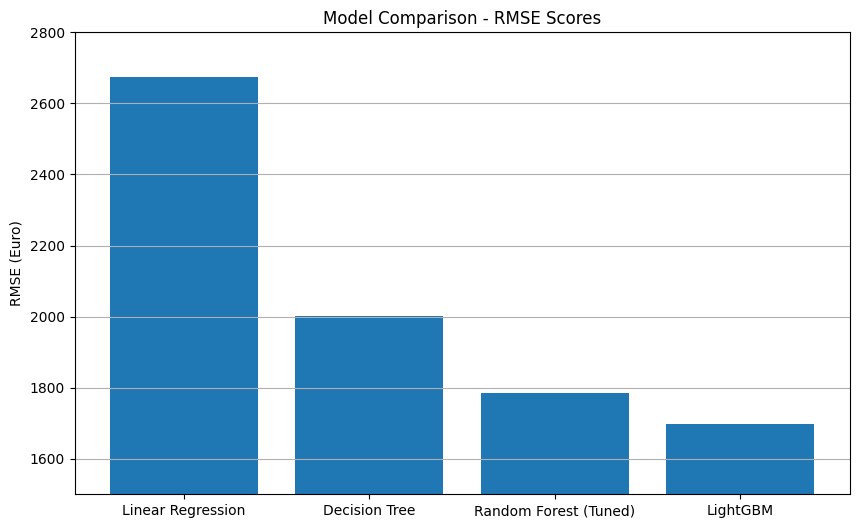

In [9]:
# Bar Chart Comparing RMSE of Different Models

import matplotlib.pyplot as plt

# RMSE values
models = ['Linear Regression', 'Decision Tree', 'Random Forest (Tuned)', 'LightGBM']
rmse_scores = [2675.00, 2001.93, 1785.26, 1697.93]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores)
plt.title('Model Comparison - RMSE Scores')
plt.ylabel('RMSE (Euro)')
plt.ylim(1500, 2800)
plt.grid(axis='y')
plt.show()
